<a href="https://colab.research.google.com/github/Mahima2208/EDA_PlayStore_Apps_Analysis/blob/main/MAHIMA_PHALKEY_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

Play Store is a platform for browsing and downloading Android applications provided by Google. It is an official app store for certified Android applications developed using the Android Software Development Kit. It includes both free as well as paid apps.
 Our study used two datasets, one dataset consisted of information on play store apps, their ratings, and the basic information about the apps, and another was a user review dataset, which provided users' opinions of the apps.


## **KNOWING THE DATASETS:**


*   # **PLAYSTORE DATASET:**

> In this dataset there are total 10,841 rows.
1.   App: Name of the application.
2.   Category: Apps are divided into different categories that categories are mention in this column.
3.   Rating: Rating is been given out of 5 which is calculated as the avg ratings given by the user.
4.   Reviews: Number of reviews received from the user.
5.   Size: Memory Size of the application.
6.   Installs: The number of installions of that paricular application.
7.   Type: Whether that app is paid or free of cost.
8.   Price: Price of the app if not free.
9.   Content Rating: This column specifies who can access this application that can be teen,everyone,mature 17+
10. Genres: The sub category of the application.
11. Last Updated: The last updated date of the app.
12. Current Version: Latest version of the app.
13. Android Version: Minimum Android version supported by the app


* # **USER REVIEWS DATASET:**


> In this dataset there are total 64,295 rows.
  1. App: Name of the application.
  2. Translated Review: Review in English by the user.
  3. Sentiment: The result of the review eitherPositive or Negative.
  4. Sentiment Polarity: It expresses the sentiment which ranges between -1 to 1 where -1 represents negative review and 1 represents positive and others depend on the type of review.
  5. Sentiment Subjectivity: This value ranges between 0 to 1. Lower values indicates factual information and higher values represent values inficates personal or public opinions.



# **FIRST TASK IN EDA**




# **IMPORTING THE NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams
color = sns.color_palette()
from wordcloud import WordCloud,STOPWORDS
import re
import warnings
warnings.filterwarnings('ignore')

## **IMPORTING THE DATASET'S INTO OUR COLLAB NOTEBOOK**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Below are the libraries that are used in order to perform EDA (Exploratory data analysis):**

*   Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated

In [3]:
path='/content/drive/MyDrive/Colab Notebooks/Cohort Tosh/Capstone Project/EDA/Play Store App Review Analysis/Play Store Data.csv'
playstore_df= pd.read_csv(path)
path_userRatings='/content/drive/MyDrive/Colab Notebooks/Cohort Tosh/Capstone Project/EDA/Play Store App Review Analysis/User Reviews.csv'
userRatings_df= pd.read_csv(path_userRatings)

## **SECOND TASK**

## **DATA EXPLORATION**

In [4]:
#Displaying the top 5 rows
playstore_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
#Displaying the bottom 10 rows
playstore_df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
#Displaying the first 10 rows
userRatings_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [7]:
#Displaying the bottom 10 rows
userRatings_df.tail(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [8]:
# Checking the data type
playstore_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
# Checking the data type
userRatings_df.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [10]:
# Checking the number ofrows andd column
playstore_df.shape

(10841, 13)

In [11]:
# Checking the number ofrows andd column
userRatings_df.shape

(64295, 5)

## **THIRD TASK:**
## **DATA CLEANING**

In data cleaning we will check for:


1.   Null values/NaN values
2.   Duplicates 
3.   Outlier Detection



In [12]:
#Getting the concise summary of data
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [13]:
#Getting the concise summary of data
userRatings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [14]:
# Getting some basic statistical information
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [15]:
# Getting some basic statistical information
userRatings_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [16]:
#Calculating the sum of null values in df
null_values_count=playstore_df.isnull().sum()
null_values_count

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [17]:
# how many total missing values do we have?
total_cells = np.product(playstore_df.shape)
total_null_values = null_values_count.sum()

# percent of data that is missing
(total_null_values/total_cells) * 100

1.0551112940191438

In [18]:
#Calculating the sum of null values in df
null_values_count_user=userRatings_df.isnull().sum()
null_values_count_user

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [19]:
# how many total missing values do we have?
total_cells = np.product(userRatings_df.shape)
total_null_values_user = null_values_count_user.sum()

# percent of data that is missing
(total_null_values_user/total_cells) * 100

33.426238432226455




*   For the numerical column, you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use the median approach.
*  This is a function to calculate median and replacing NaN values with median . 


In [20]:
def replace_na_with_median(data):
  playstore_df[data].fillna(round(playstore_df[data].median(),2),inplace=True)

replace_na_with_median('Rating')

In [21]:
playstore_df[playstore_df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver





*   NaN values for Rating column are replaced by median value.












*   For the categorical column, you can replace the missing values with mode values i.e the frequent ones
*  
This is a function to calculate mode and replacing NaN values with mode



In [22]:
def replace_na_with_mode(data):
  playstore_df[data].fillna(playstore_df[data].mode()[0],inplace=True)


In [23]:
playstore_df[playstore_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [24]:
#playstore_df['Type'].fillna(playstore_df['Type'].mode()[0],inplace=True)
replace_na_with_mode('Type')
replace_na_with_mode('Content Rating')
replace_na_with_mode('Android Ver')
replace_na_with_mode('Current Ver')

In [25]:
#Checking if NaN values are removed or not
playstore_df[playstore_df['App']=="Command & Conquer: Rivals"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,Free,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [26]:
playstore_df[playstore_df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [27]:
playstore_df[playstore_df['App']=='Life Made WI-Fi Touchscreen Photo Frame']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up



*   NaN values for Type,Content Rating,Android Ver,Current Ver column are replaced by mode value.

In [28]:
missing_values_count=playstore_df.isnull().sum()
missing_values_count

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## **Dropping the duplicate rows**

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. 

In [29]:
#Checking for duplicate apps
playstore_df[playstore_df.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up




1.   Changing the data type and cleaning the data in Installs column
2.   Removing duplicate values based on the maximum number of Installs.



In [30]:
#playstore_df.drop_duplicates(subset='App',keep='first',inplace=True,ignore_index=True)
#Replacing unwanted things from the Installs column and converting the data type of Installs column yo int
playstore_df['Installs']=playstore_df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
playstore_df['Installs']=playstore_df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)

playstore_df = playstore_df[~(playstore_df['Installs'] == "Free")].reset_index(drop=True)
playstore_df['Installs']=playstore_df['Installs'].apply(lambda x: int(x)) 

In [31]:
#Checking the data type of Installs column
playstore_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [32]:
#Creating a new dataFrame with max number of Installs grouped by Apps
playstore_withoutduplicates_df=playstore_df.groupby('App')['Installs'].max().reset_index()

In [33]:
#Checking the shape of new df
playstore_withoutduplicates_df.shape

(9659, 2)

In [34]:
#Checking the data type of new df
playstore_withoutduplicates_df.dtypes

App         object
Installs     int64
dtype: object

In [35]:
#Merging the data frames to get other columns data with respect to App and Installs
play_store_df_1=playstore_withoutduplicates_df.merge(playstore_df,on=['App','Installs'])

In [36]:
play_store_df_1

,App,Installs,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",500,SPORTS,4.3,27,3.6M,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
1,+Download 4 Instagram Twitter,1000000,SOCIAL,4.5,40467,22M,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
2,- Free Comics - Comic Apps,10000,COMICS,3.5,115,9.1M,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3,.R,10000,TOOLS,4.5,259,203k,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4,/u/app,10000,COMMUNICATION,4.7,573,53M,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10816,"뽕티비 - 개인방송, 인터넷방송, BJ방송",100000,VIDEO_PLAYERS,4.3,414,59M,Free,0,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up
10817,💎 I'm rich,10000,LIFESTYLE,3.8,718,26M,Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
10818,"💘 WhatsLov: Smileys of love, stickers and GIF",1000000,SOCIAL,4.6,22098,18M,Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
10819,📏 Smart Ruler ↔️ cm/inch measuring for homework!,10000,TOOLS,4.0,19,3.2M,Free,0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up


In [37]:
#Checking duplicate apps again
play_store_df_1[play_store_df_1.duplicated('App')]

,App,Installs,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8,10 Best Foods for You,500000,HEALTH_AND_FITNESS,4.0,2490,3.8M,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
22,1800 Contacts - Lens Store,1000000,MEDICAL,4.7,23160,26M,Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
32,2017 EMRA Antibiotic Guide,1000,MEDICAL,4.4,12,3.8M,Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
39,21-Day Meditation Experience,100000,HEALTH_AND_FITNESS,4.4,11506,15M,Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
62,365Scores - Live Scores,10000000,SPORTS,4.6,666246,25M,Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10754,"theScore: Live Sports Scores, News, Stats & Vi...",10000000,SPORTS,4.4,133833,34M,Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
10755,"theScore: Live Sports Scores, News, Stats & Vi...",10000000,SPORTS,4.4,133833,34M,Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
10761,trivago: Hotels & Travel,50000000,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
10762,trivago: Hotels & Travel,50000000,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device


In [38]:
#There are duplicates after merging the two dataFrames so removing duplicates keeping the first entry
play_store_df_1.drop_duplicates(subset='App',keep='first',inplace=True,ignore_index=True)

In [39]:
play_store_df_1.shape

(9659, 13)

In [40]:
#Checking if there are any duplicate apps for the last time
play_store_df_1[play_store_df_1.duplicated('App')]

,App,Installs,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### **RENAMING COLUMN NAMES**

In [41]:
play_store_df_1.rename(columns={"Content Rating":"Content_Rating","Last Updated":"Last_Updated","Current Ver":"Current_Ver","Android Ver":"Android_Ver"},inplace=True)

### **OUTLIER DETECTION**

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It’s often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it’s a good idea to remove them.

Using BoxPlot to identify outliers 


*   Outliers arise due to changes in system behaviour, fraudulent behaviour, human error, instrument error or simply through natural deviations in populations. Using boxplot to observe, analyze and remove them 
*   We have to determine whether we need to remove or not. Will removing outlier help in adding value to your analysis on that basis we need to remove the outier




In [42]:
#Checking rating less than 1
play_store_df_1[play_store_df_1['Rating']<1]

,App,Installs,Category,Rating,Reviews,Size,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


In [43]:
#Checking rating more than 5
play_store_df_1[play_store_df_1['Rating']>5]

,App,Installs,Category,Rating,Reviews,Size,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


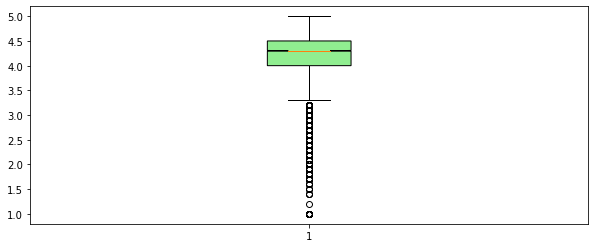

In [44]:
#After removal of outlier
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
all_data=play_store_df_1['Rating']
bplot1 = ax1.boxplot(all_data,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True  # fill with color
                     ) 
colors=['lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
  patch.set_facecolor(color)

    

After checking for outlier as we know that Rating is given in between 1 to 5 but there was one record with App name="Life Made WI-Fi Touchscreen Photo Frame" which got removed when we removed Free from Installs column.

### **DATATYPE CORRECTION**

In the given data frame there can be some columns which do not have proper data type such as Last Updated should be in date time format rather than object and removing the irrelevant stuff from data such as K and M from Size column

In [45]:
play_store_df_1.head()

,App,Installs,Category,Rating,Reviews,Size,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",500,SPORTS,4.3,27,3.6M,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
1,+Download 4 Instagram Twitter,1000000,SOCIAL,4.5,40467,22M,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
2,- Free Comics - Comic Apps,10000,COMICS,3.5,115,9.1M,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3,.R,10000,TOOLS,4.5,259,203k,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4,/u/app,10000,COMMUNICATION,4.7,573,53M,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up


In [46]:
play_store_df_1.dtypes

App                object
Installs            int64
Category           object
Rating            float64
Reviews            object
Size               object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

In [47]:
def remove_emojis(text):
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text) # no emoji

In [48]:
playstore_df['App']=playstore_df['App'].apply(lambda x: remove_emojis(x))

In [49]:
#Checking for Price=Everyone
play_store_df_1[play_store_df_1['Price']=='Everyone']

,App,Installs,Category,Rating,Reviews,Size,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


In [50]:
#Removing the $ from Price column and converting the data type to float
play_store_df_1['Price']=play_store_df_1['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)
play_store_df_1['Price']=play_store_df_1['Price'].apply(lambda x: float(x))
play_store_df_1 = play_store_df_1[~(play_store_df_1['Price'] == "Everyone")].reset_index(drop=True) 

play_store_df_1.rename(columns={"Price":"Price_in_dollars"},inplace=True)

In [51]:
play_store_df_1[play_store_df_1['Price_in_dollars']=='Everyone']

,App,Installs,Category,Rating,Reviews,Size,Type,Price_in_dollars,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


In [52]:
#Removing M and k from Size
play_store_df_1 = play_store_df_1[~(play_store_df_1['Size'] == "Varies with device")].reset_index(drop=True)
play_store_df_1['Size']=play_store_df_1['Size'].apply(lambda x: str(x).replace('M','').replace('+','').replace(',','') if 'M' in str(x) else x)
#Converting Size in one common type i.e in MB 
play_store_df_1['Size']=play_store_df_1['Size'].apply(lambda x: float(str(x).replace('k',''))/1024 if 'k' in str(x) else x)
#Converting data type to float 
play_store_df_1['Size']=round(play_store_df_1['Size'].astype(float),2)
#Converting Reviews data type to int
play_store_df_1['Reviews']=play_store_df_1['Reviews'].astype(int)
#Renaming the Size column name to Size in MB
play_store_df_1.rename(columns={'Size':'Size_in_MB'},inplace=True)

In [53]:
play_store_df_1["Android_Ver"].unique()

array(['4.1 and up', '5.0 and up', '1.5 and up', '4.2 and up',
       '4.4 and up', '2.3.3 and up', '2.2 and up', '2.1 and up',
       '4.0 and up', '4.0.3 and up', '1.6 and up', '2.3 and up',
       '4.3 and up', '2.0.1 and up', '3.0 and up', 'Varies with device',
       '3.1 and up', '3.2 and up', '6.0 and up', '7.0 and up',
       '5.0 - 8.0', '5.1 and up', '2.0 and up', '4.4W and up',
       '1.0 and up', '4.0.3 - 7.1.1', '8.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1', '7.1 and up', '4.1 - 7.1.1', '5.0 - 6.0',
       '7.0 - 7.1.1'], dtype=object)

In [54]:
play_store_df_1["Current_Ver"].unique()

array(['0.22', '5.03', '5.0.12', ..., '6.1.1', 'v3.1.1', '1.1.3.2'],
      dtype=object)

In [55]:
#Removing - and values from column
def hyphen_values_removal(data):
  split_string = data.split("-", 1)
  substring = split_string[0]
  return substring
# Removing data after second dot
def irregular_data(text):
  k=  (text.find(".")) #find "." in a string
  m = (text.find(".", k+1)) #Find second "." in a string
  new_string = text[:m]
  return new_string
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return ".".join(num)
def cleaning_data(text):
  if len(text)>1:
    text = text[:0] + "." + text[1:3]
  return text  

In [56]:
#Removing and up from Android Ver column
play_store_df_1['Android_Ver']=play_store_df_1['Android_Ver'].apply(lambda x: str(x).replace('and up','') if 'and up' in str(x) else x)
#Removing W from column
play_store_df_1['Android_Ver']=play_store_df_1['Android_Ver'].apply(lambda x: x.replace('W','') if 'W' in str(x) else x)
#Removing - and removing data after second .
play_store_df_1['Android_Ver']=play_store_df_1['Android_Ver'].apply(lambda x: hyphen_values_removal(x) if '-' in str(x) else x)
play_store_df_1['Android_Ver']=play_store_df_1['Android_Ver'].apply(lambda x: irregular_data(x) if '.' in str(x) else x)

#Removing v from column
play_store_df_1['Current_Ver']=play_store_df_1['Current_Ver'].apply(lambda x: x.replace('v','') if 'v' in str(x) else x)
#Removing - and removing data after second .
play_store_df_1['Current_Ver']=play_store_df_1['Current_Ver'].apply(lambda x: hyphen_values_removal(x) if '-' in str(x) else x)
play_store_df_1['Current_Ver']=play_store_df_1['Current_Ver'].apply(lambda x: find_number(x))
play_store_df_1['Current_Ver']=play_store_df_1['Current_Ver'].apply(lambda x: cleaning_data(x) if '.' not in str(x) else x)
play_store_df_1['Current_Ver']=play_store_df_1['Current_Ver'].apply(lambda x: irregular_data(x) if '.' in str(x) else x)


In [57]:
play_store_df_1["Android_Ver"].unique()

array(['4.1', '5.0', '1.5', '4.2', '4.4', '2.3', '2.2', '2.1', '4.0',
       '1.6', '4.3', '2.0', '3.0', 'Varies with device', '3.1', '3.2',
       '6.0', '7.0', '5.1', '1.0', '8.0', '7.1'], dtype=object)

In [58]:
play_store_df_1

,App,Installs,Category,Rating,Reviews,Size_in_MB,Type,Price_in_dollars,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",500,SPORTS,4.3,27,3.6,Free,0.00,Everyone,Sports,"October 7, 2017",0.2,4.1
1,+Download 4 Instagram Twitter,1000000,SOCIAL,4.5,40467,22.0,Free,0.00,Everyone,Social,"August 2, 2018",5.0,4.1
2,- Free Comics - Comic Apps,10000,COMICS,3.5,115,9.1,Free,0.00,Mature 17+,Comics,"July 13, 2018",5.0,5.0
3,.R,10000,TOOLS,4.5,259,0.2,Free,0.00,Everyone,Tools,"September 16, 2014",1.1,1.5
4,/u/app,10000,COMMUNICATION,4.7,573,53.0,Free,0.00,Mature 17+,Communication,"July 3, 2018",4.2,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8425,"뽕티비 - 개인방송, 인터넷방송, BJ방송",100000,VIDEO_PLAYERS,4.3,414,59.0,Free,0.00,Mature 17+,Video Players & Editors,"July 18, 2018",4.0,4.0
8426,💎 I'm rich,10000,LIFESTYLE,3.8,718,26.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0,4.4
8427,"💘 WhatsLov: Smileys of love, stickers and GIF",1000000,SOCIAL,4.6,22098,18.0,Free,0.00,Everyone,Social,"July 24, 2018",4.2,4.0
8428,📏 Smart Ruler ↔️ cm/inch measuring for homework!,10000,TOOLS,4.0,19,3.2,Free,0.00,Everyone,Tools,"October 21, 2017",1.,4.2


In [59]:
#Converting the data type to date time
play_store_df_1['Last_Updated'] = pd.to_datetime(play_store_df_1['Last_Updated'])

In [60]:
#Checking the data type of each column 
play_store_df_1.dtypes

App                         object
Installs                     int64
Category                    object
Rating                     float64
Reviews                      int64
Size_in_MB                 float64
Type                        object
Price_in_dollars           float64
Content_Rating              object
Genres                      object
Last_Updated        datetime64[ns]
Current_Ver                 object
Android_Ver                 object
dtype: object

### **Data Analysis**


*    After cleaning the data our next step is to analyze each column of our data frame
*   Data Analysis is the process of systematically applying statistical and/or logical techniques to describe and illustrate, condense and recap, and evaluate data.



In [61]:
play_store_df_1

,App,Installs,Category,Rating,Reviews,Size_in_MB,Type,Price_in_dollars,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",500,SPORTS,4.3,27,3.6,Free,0.00,Everyone,Sports,2017-10-07,0.2,4.1
1,+Download 4 Instagram Twitter,1000000,SOCIAL,4.5,40467,22.0,Free,0.00,Everyone,Social,2018-08-02,5.0,4.1
2,- Free Comics - Comic Apps,10000,COMICS,3.5,115,9.1,Free,0.00,Mature 17+,Comics,2018-07-13,5.0,5.0
3,.R,10000,TOOLS,4.5,259,0.2,Free,0.00,Everyone,Tools,2014-09-16,1.1,1.5
4,/u/app,10000,COMMUNICATION,4.7,573,53.0,Free,0.00,Mature 17+,Communication,2018-07-03,4.2,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8425,"뽕티비 - 개인방송, 인터넷방송, BJ방송",100000,VIDEO_PLAYERS,4.3,414,59.0,Free,0.00,Mature 17+,Video Players & Editors,2018-07-18,4.0,4.0
8426,💎 I'm rich,10000,LIFESTYLE,3.8,718,26.0,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0,4.4
8427,"💘 WhatsLov: Smileys of love, stickers and GIF",1000000,SOCIAL,4.6,22098,18.0,Free,0.00,Everyone,Social,2018-07-24,4.2,4.0
8428,📏 Smart Ruler ↔️ cm/inch measuring for homework!,10000,TOOLS,4.0,19,3.2,Free,0.00,Everyone,Tools,2017-10-21,1.,4.2


In [62]:
play_store_df_1.dtypes

App                         object
Installs                     int64
Category                    object
Rating                     float64
Reviews                      int64
Size_in_MB                 float64
Type                        object
Price_in_dollars           float64
Content_Rating              object
Genres                      object
Last_Updated        datetime64[ns]
Current_Ver                 object
Android_Ver                 object
dtype: object

### **Basic Observation**

In [63]:
play_store_df_1.describe()

,Installs,Rating,Reviews,Size_in_MB,Price_in_dollars
count,8.430000e+03,8430.000000,8.430000e+03,8430.000000,8430.000000
mean,3.730978e+06,4.183903,1.208336e+05,20.399448,1.223893
std,2.483736e+07,0.512770,9.365507e+05,21.829350,18.030259
min,0.000000e+00,1.000000,0.000000e+00,0.010000,0.000000
25%,1.000000e+03,4.000000,1.700000e+01,4.600000,0.000000
50%,5.000000e+04,4.300000,4.780000e+02,12.000000,0.000000
75%,1.000000e+06,4.500000,1.567850e+04,28.000000,0.000000
max,1.000000e+09,5.000000,4.489172e+07,100.000000,400.000000


#With Rating==5 Data Aanalysis


In [64]:
#Checking the apps with rating=5
highest_rating_df=play_store_df_1[play_store_df_1['Rating']==5]

In [65]:
highest_rating_df

,App,Installs,Category,Rating,Reviews,Size_in_MB,Type,Price_in_dollars,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
33,211:CK,10,GAME,5.0,8,38.00,Paid,0.99,Teen,Arcade,2018-04-11,1.,4.1
47,30WPM Amateur ham radio Koch CW Morse code tra...,10,FAMILY,5.0,1,3.70,Paid,1.49,Everyone,Education,2018-05-18,2.0,2.1
69,420 BZ Budeze Delivery,100,MEDICAL,5.0,2,11.00,Free,0.00,Mature 17+,Medical,2018-06-06,1.0,4.1
104,A-Y Collection,100,SHOPPING,5.0,2,2.90,Free,0.00,Teen,Shopping,2018-02-16,1.,4.1
135,AC DC Power Monitor,10,LIFESTYLE,5.0,1,1.20,Paid,3.04,Everyone,Lifestyle,2016-05-29,1.,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,ei Calc,10,TOOLS,5.0,2,19.00,Free,0.00,Everyone,Tools,2015-10-12,1.2,2.3
8274,i am EB,10,PHOTOGRAPHY,5.0,1,5.40,Free,0.00,Teen,Photography,2017-02-01,1.,4.1
8281,iCard BD Plus,500,SOCIAL,5.0,2,2.40,Free,0.00,Everyone,Social,2016-07-15,3.7,2.0
8297,iReadMe,100,PRODUCTIVITY,5.0,8,22.00,Free,0.00,Everyone,Productivity,2018-03-06,1.,4.4


In [66]:
#Number of apps with rating 5
highest_rating_df.shape

(266, 13)

In [67]:
#Checking the name of category which has the highest rating
highest_rating_df.groupby('Category')['Rating'].count().reset_index().max()

Category    TRAVEL_AND_LOCAL
Rating                    65
dtype: object



1.  There are 266 apps with the highest rating i.e 5.
2.  Travel and Local is the category which is having highest number of ratings as 5.







In [68]:
#Getting the mean of Rating w.r.t to Category
play_store_df_1.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(5)

Category
EVENTS             4.419298
EDUCATION          4.368182
ART_AND_DESIGN     4.358065
PARENTING          4.338889
PERSONALIZATION    4.319943
Name: Rating, dtype: float64

In [69]:
# Max of reviews
play_store_df_1['Reviews'].max()

44891723

In [70]:
# Max of Installs
play_store_df_1['Installs'].max()

1000000000

Here I checked if the number of installs is greater than number of reviews

In [71]:
#Checking mean of reviews w.r.t Category
play_store_df_1.groupby('Category')['Reviews'].mean().sort_values(ascending=False).head(5)

Category
GAME             600807.032073
COMMUNICATION    189678.706612
VIDEO_PLAYERS    182113.385827
PHOTOGRAPHY      173422.648649
ENTERTAINMENT    157911.734375
Name: Reviews, dtype: float64

In [72]:
#Maximum number of Size in data frame
play_store_df_1['Size_in_MB'].value_counts().max()

182

In [73]:
#Number of free and paid apps
play_store_df_1['Type'].value_counts()

Free    7747
Paid     683
Name: Type, dtype: int64

In [74]:
#Getting data where Type = Paid
play_store_df_1[play_store_df_1['Type']=='Paid']

,App,Installs,Category,Rating,Reviews,Size_in_MB,Type,Price_in_dollars,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
9,10 WPM Amateur ham radio CW Morse code trainer,100,COMMUNICATION,3.5,10,3.80,Paid,1.49,Everyone,Communication,2018-05-12,2.1,2.1
10,"10,000 Quotes DB (Premium)",500,BOOKS_AND_REFERENCE,4.1,70,3.50,Paid,0.99,Everyone,Books & Reference,2013-08-30,1.,2.1
19,17th Edition Cable Sizer,1000,BOOKS_AND_REFERENCE,4.4,47,1.40,Paid,3.08,Everyone,Books & Reference,2016-05-27,1.2,2.2
23,2 Amateur ham radio CW Morse code practice key...,100,COMMUNICATION,4.8,6,3.50,Paid,1.49,Everyone,Communication,2018-03-05,1.0,1.6
27,2017 EMRA Antibiotic Guide,1000,MEDICAL,4.4,12,3.80,Paid,16.99,Everyone,Medical,2017-01-27,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8393,weather HD,10000,PERSONALIZATION,4.0,1546,4.50,Paid,1.99,Everyone,Personalization,2014-02-26,3.,2.1
8397,¡Ay Caramba!,1,FAMILY,4.3,0,0.54,Paid,1.99,Everyone,Education,2014-06-13,1.,3.0
8400,Égalité et Réconciliation,500,NEWS_AND_MAGAZINES,4.9,58,3.80,Paid,2.99,Everyone,News & Magazines,2018-05-26,1.1,5.0
8405,Билеты ПДД CD 2019 PRO,100,AUTO_AND_VEHICLES,4.3,21,16.00,Paid,1.49,Everyone,Auto & Vehicles,2018-07-27,1.4,4.0


In [75]:
#Name of app with highest price
app_name_with_highest_price=play_store_df_1[play_store_df_1['Price_in_dollars'].max()==play_store_df_1['Price_in_dollars']]['App'].index
play_store_df_1['App'][app_name_with_highest_price]

4756    I'm Rich - Trump Edition
Name: App, dtype: object

In [76]:
#Finding the Max Price
play_store_df_1['Price_in_dollars'].max()

400.0

"I'm Rich - Trump Edition" this app is haing the highest price i.e 400 $ 

In [77]:
# Name of app with highest reviews 
app_name_with_highest_review=play_store_df_1[play_store_df_1['Reviews'].max()==play_store_df_1['Reviews']]['App'].index
play_store_df_1['App'][app_name_with_highest_review]

2315    Clash of Clans
Name: App, dtype: object

In [78]:
play_store_df_1[play_store_df_1['App']=="Clash of Clans"]

,App,Installs,Category,Rating,Reviews,Size_in_MB,Type,Price_in_dollars,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2315,Clash of Clans,100000000,GAME,4.6,44891723,98.0,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322,4.1


"Clash of Clans" is the app with highest review which comes under game category which is free of cost

In [79]:
#First 5 apps with highest reviews 
index_of_maximum_reviews=play_store_df_1['Reviews'].sort_values(ascending=False).head().index
play_store_df_1.iloc[index_of_maximum_reviews]['App']

2315                                 Clash of Clans
7112                                 Subway Surfers
2312                                   Clash Royale
2139                               Candy Crush Saga
7620    UC Browser - Fast Download Private & Secure
Name: App, dtype: object


*   The first 5 apps with reviews are of GAME category


In [80]:
#play_store_df_1.describe()
#Checking for apps and category whose price is greater than or equal to 300
apps_with_greatest_price=play_store_df_1.loc[play_store_df_1['Price_in_dollars']>=300]
apps_with_greatest_price.loc[:,['App','Category']]

,App,Category
3631,Eu Sou Rico,FINANCE
4728,I AM RICH PRO PLUS,FINANCE
4730,I Am Rich,FAMILY
4731,I Am Rich Premium,FINANCE
4732,I Am Rich Pro,FAMILY
4744,I am Rich,FINANCE
4746,I am Rich Plus,FAMILY
4748,I am Rich!,FINANCE
4749,I am extremely Rich,LIFESTYLE
4750,I am rich,LIFESTYLE


In [81]:
#Checking for the sum of number of Installs w.r.t apps which are present in highest priced apps
apps_with_greatest_price.groupby('App')['Installs'].sum().reset_index()

,App,Installs
0,Eu Sou Rico,0
1,I AM RICH PRO PLUS,1000
2,I Am Rich,10000
3,I Am Rich Premium,50000
4,I Am Rich Pro,5000
5,I am Rich,5000
6,I am Rich Plus,10000
7,I am Rich!,1000
8,I am extremely Rich,1000
9,I am rich,100000


## **DATA VISUALIZATION**

Data visualization in python is perhaps one of the most utilized features for data science with python in today’s day and age. The libraries in python come with lots of different features that enable users to make highly customized, elegant, and interactive plots.


Data Visualization libraries in Python are:
1.   Matplotlib:Matplotlib is a visualization library in Python for 2D plots of arrays. Matplotlib is written in Python and makes use of the NumPy library.Matplotlib comes with a wide variety of plots like line, bar, scatter, histogram, etc. which can help us, deep-dive, into understanding trends, patterns, correlations.
2.   Seaborn:Seaborn is a dataset-oriented library for making statistical representations in Python. It is developed atop matplotlib and to create different visualizations. It is integrated with pandas data structures. The library internally performs the required mapping and aggregation to create informative visuals 



In [82]:
play_store_df_1

,App,Installs,Category,Rating,Reviews,Size_in_MB,Type,Price_in_dollars,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",500,SPORTS,4.3,27,3.6,Free,0.00,Everyone,Sports,2017-10-07,0.2,4.1
1,+Download 4 Instagram Twitter,1000000,SOCIAL,4.5,40467,22.0,Free,0.00,Everyone,Social,2018-08-02,5.0,4.1
2,- Free Comics - Comic Apps,10000,COMICS,3.5,115,9.1,Free,0.00,Mature 17+,Comics,2018-07-13,5.0,5.0
3,.R,10000,TOOLS,4.5,259,0.2,Free,0.00,Everyone,Tools,2014-09-16,1.1,1.5
4,/u/app,10000,COMMUNICATION,4.7,573,53.0,Free,0.00,Mature 17+,Communication,2018-07-03,4.2,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8425,"뽕티비 - 개인방송, 인터넷방송, BJ방송",100000,VIDEO_PLAYERS,4.3,414,59.0,Free,0.00,Mature 17+,Video Players & Editors,2018-07-18,4.0,4.0
8426,💎 I'm rich,10000,LIFESTYLE,3.8,718,26.0,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0,4.4
8427,"💘 WhatsLov: Smileys of love, stickers and GIF",1000000,SOCIAL,4.6,22098,18.0,Free,0.00,Everyone,Social,2018-07-24,4.2,4.0
8428,📏 Smart Ruler ↔️ cm/inch measuring for homework!,10000,TOOLS,4.0,19,3.2,Free,0.00,Everyone,Tools,2017-10-21,1.,4.2


Plotting graph for Rating vs number of Apps

# **Line Chart:**


> A line chart is used for the representation of continuous data points. This visual can be effectively utilized when we want to understand the trend across time.



In [83]:
#Number of apps w.r.t Rating
app_count_wrt_rating=play_store_df_1.groupby('Rating')['App'].count().reset_index()


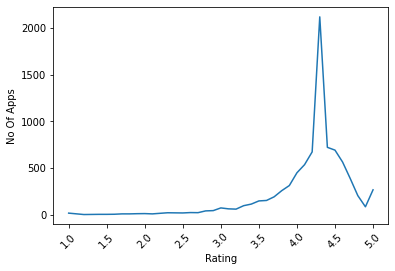

<Figure size 1440x360 with 0 Axes>

In [84]:
#By using app_count_wrt_rating plotting line chart
sns.lineplot(x="Rating", y="App",data=app_count_wrt_rating,palette="crest")
plt.ylabel("No Of Apps")
plt.xticks(rotation=45)
plt.figure(figsize=(20,5))
rcParams['figure.figsize'] = 7,5



*   Highest number of apps are having rating in between 4.0 and 4.5.   
*   There are 2000+ apps with rating between 4.0 to 4.5.





##  DistPlot:
    1.  Seaborn distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations. We use seaborn in combination with matplotlib, the Python plotting module.
    2. A distplot plots a univariate distribution of observations. The distplot() function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions.










Plotting a density plot for Rating

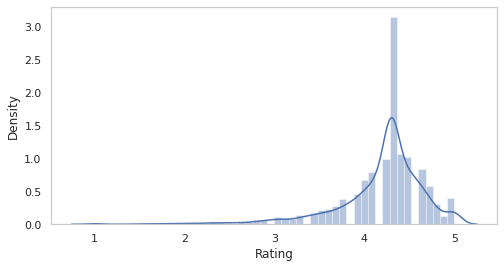

In [85]:
#distplot of column Rating
sns.set(rc={"figure.figsize": (8, 4)}) 
sns.set_style("whitegrid")
rating_dist=sns.distplot(play_store_df_1['Rating'],color='b')
rating_dist.grid(False)
plt.show()

# **Scatter Plot:**
Scatter plots can be leveraged to identify relationships between two variables. It can be effectively used in circumstances where the dependent variable can have multiple values for the independent variable.

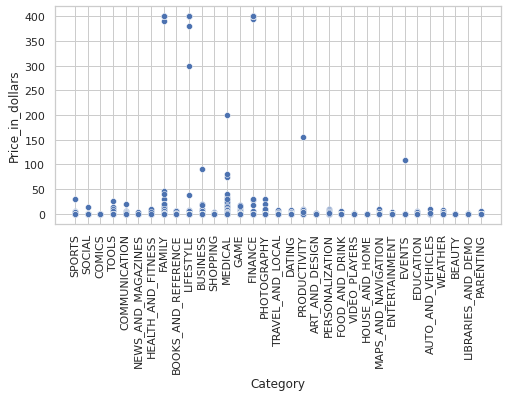

<Figure size 2160x360 with 0 Axes>

In [86]:
#Plotting for column Category vs Price
sns.scatterplot(x="Category", y="Price_in_dollars",data=play_store_df_1,palette="crest")

plt.xticks(rotation=90)
plt.figure(figsize=(30,5))
rcParams['figure.figsize'] = 20,5



1.   Lifestyle, Family, and Finance categories are having highest price.
2.   Most of the categories are having price less than or equal to 50 $



# **PIE CHART:**
Pie charts can be used to identify proportions of the different components in a given whole

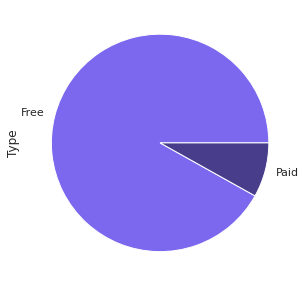

In [87]:
#Plotting pie chart for type
play_store_df_1['Type'].value_counts().plot.pie(colors=['#7B68EE','#483D8B'])

plt.show()



*   Free apps are more as compared to Paid apps.



# **CountPlot:**
seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.

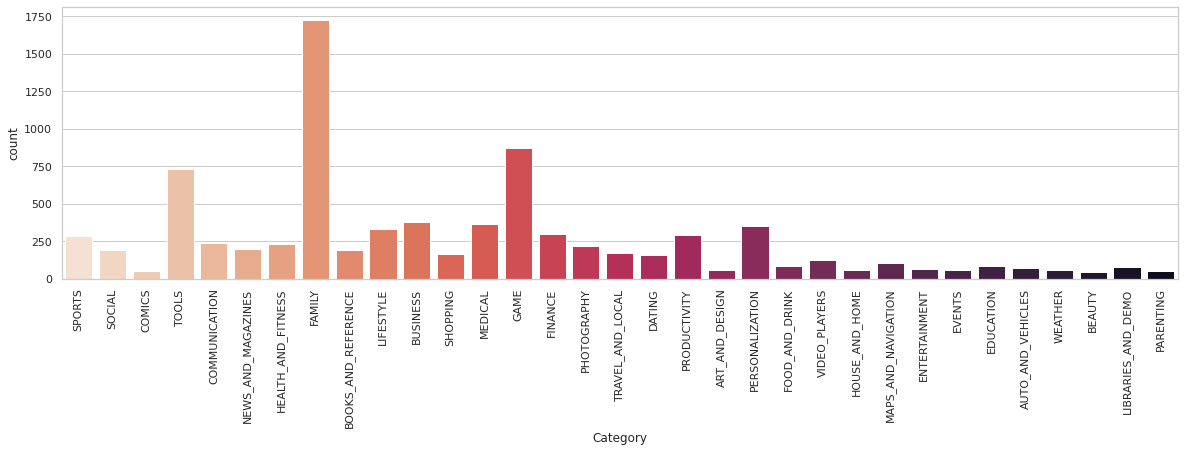

In [88]:
category_count=sns.countplot(x="Category",data=play_store_df_1,palette="rocket_r")
category_count.set_xticklabels(category_count.get_xticklabels(), rotation=90)
sns.set_style("whitegrid")



1.   Family category is having the highest count.
2.   Game is the second highest category.



# **HEAT MAP:**
Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix. In this, to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values, darker colors are preferred. Heatmap is also defined by the name of the shading matrix. Heatmaps in Seaborn can be plotted by using the seaborn.heatmap() function.


## **Corr() function:**
Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

In [89]:
#Finding pairwise correlation of dataframe pearson corr
corr=play_store_df_1.corr()
corr

,Installs,Rating,Reviews,Size_in_MB,Price_in_dollars
Installs,1.000000,0.040583,0.597393,0.134214,-0.010145
Rating,0.040583,1.000000,0.061398,0.045508,-0.018636
Reviews,0.597393,0.061398,1.000000,0.179262,-0.008644
Size_in_MB,0.134214,0.045508,0.179262,1.000000,-0.022373
Price_in_dollars,-0.010145,-0.018636,-0.008644,-0.022373,1.000000


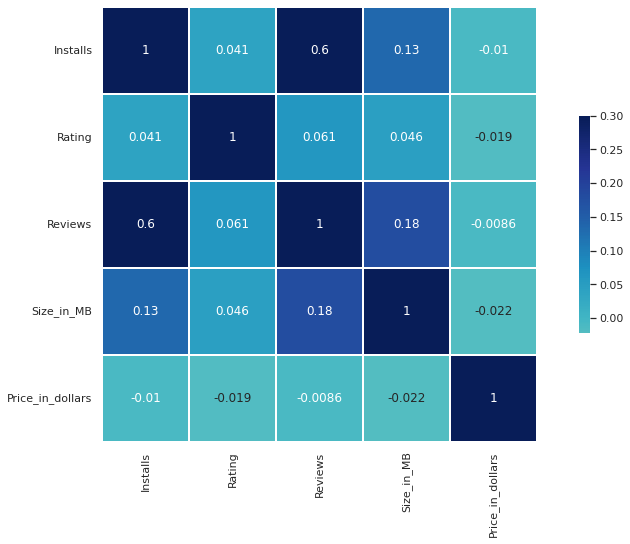

In [90]:
#Plotting Heat Map for the correlation values
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr,  vmax=.3, center=0,cmap="YlGnBu",annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.gcf().set_size_inches(15, 8)



1.   The number of installs are greater if reviews are higher.
2.   Positive correlation exists between Installs and reviews i.e. 0.6



## **Checking if App size is bulky or not ?**

# **JointPlot:**
Draw a plot of two variables with bivariate and univariate graphs.
This function provides a convenient interface to the JointGrid class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use JointGrid directly.

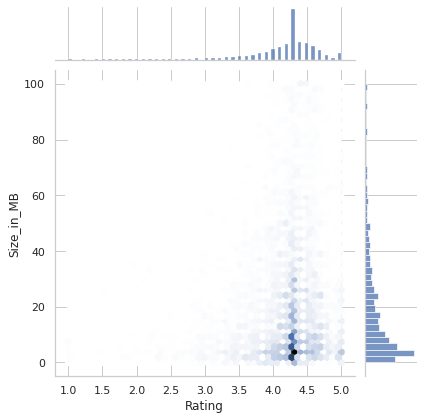

In [91]:
#Plotting a joint plot with Rating against Size in MB
sns.jointplot(x = "Rating", y = "Size_in_MB",kind = "hex",color='B', data = play_store_df_1)

# **BAR CHART:**
A bar chart is used when we want to compare metric values across different subgroups of the data. If we have a greater number of groups, a bar chart is preferred over a column chart.

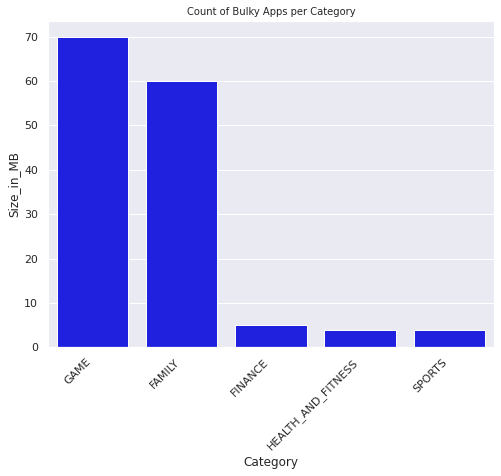

In [92]:
#Creating a df which are having apps with size greater than 90
bulky_apps_df = play_store_df_1[play_store_df_1["Size_in_MB"]>90]
#Grouping the size with category
group_category = bulky_apps_df.groupby("Category")["Size_in_MB"].count().sort_values(ascending=False).reset_index().head()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
sns.set_style("darkgrid")
ax = sns.barplot(x="Category", y="Size_in_MB", data=group_category, color = "blue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title('Count of Bulky Apps per Category',size = 10)
plt.savefig("Count_bulky")



1.   Apps with highest rating i.e. is between 4.0 to 4.5 is having size 0-20 MB.
2.   Gaming and Family categorical apps are bulky. 



## **Content Rating Analysis:**

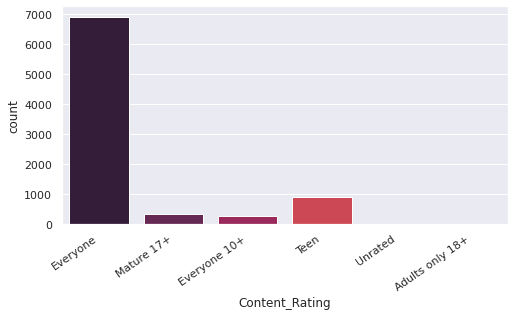

In [93]:
#Plotting countplot for Content Rating
plt.figure(figsize=(8,4))
plt.xticks(rotation = 35, ha = 'right')
sns.countplot(x='Content_Rating',data=play_store_df_1,palette="rocket")

Most of the apps are not age restricted. Every age group can access the apps.

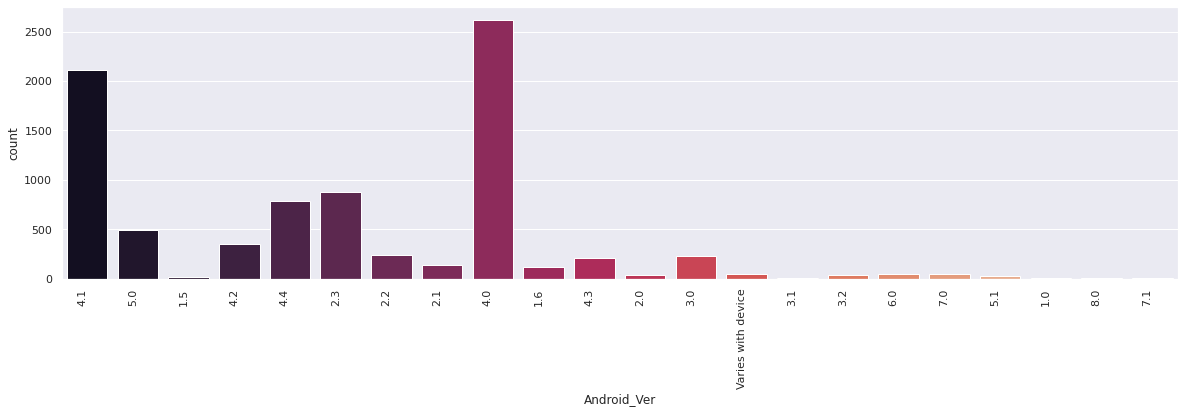

In [144]:
plt.figure(figsize=(20,5))
plt.xticks(rotation = 90, ha = 'right')
sns.countplot(x='Android_Ver',data=play_store_df_1,palette="rocket")

Many apps are having lowest Android Ver preference as 4.0

## **PAIR PLOT:**
Plot pairwise relationships in a dataset.
By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

<Figure size 1440x288 with 0 Axes>

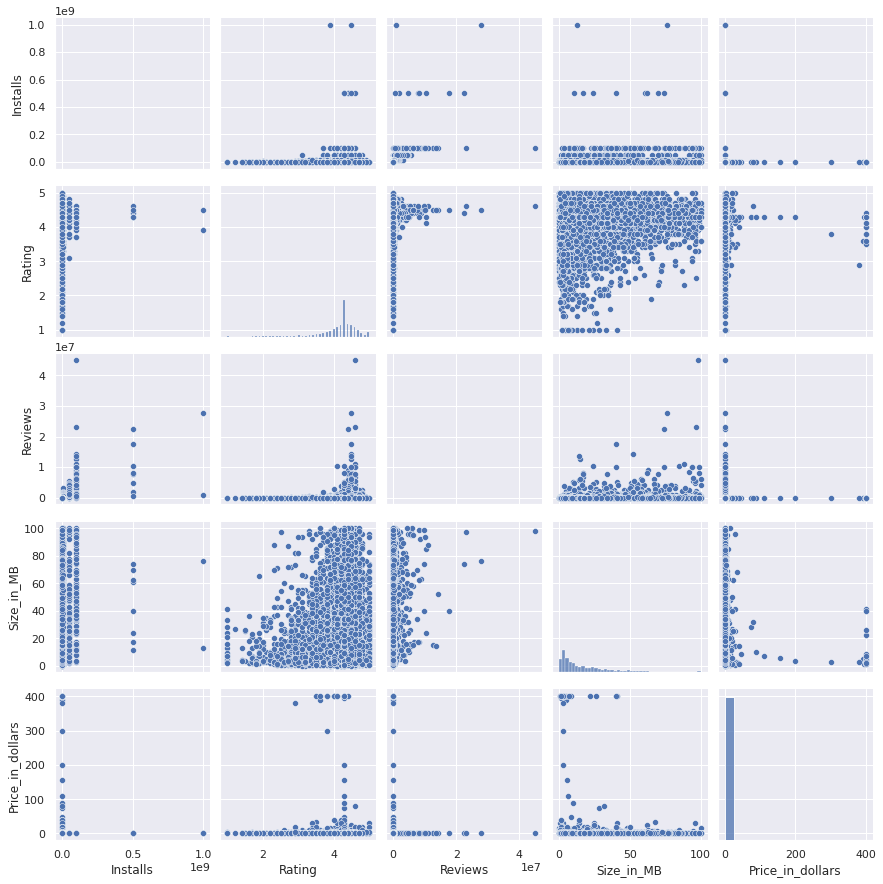

In [94]:
plt.figure(figsize=(20,4))
df = play_store_df_1
sns.pairplot(df)

### **SENTIMENT ANALYSIS**

In [95]:
#Getting the first 10 rows 
userRatings_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [96]:
#Getting the number of rows and column of df
userRatings_df.shape

(64295, 5)

In [97]:
userRatings_df["App"].nunique()

1074

1074 apps are having the reviews given by users.

Merging the two data frames playstore and user rating data frame by taking App, Type and Price from the play store data frame on App column.
We will need Type and Price to analyse the user rating data frame better so we merged that columns.


In [98]:
#Merging the two data frame
userRating_playstore_df=pd.merge(userRatings_df,play_store_df_1[['App','Type',"Price_in_dollars"]],on='App',how="inner")

In [99]:
#Getting the number of rows and columns from df
userRating_playstore_df.shape

(41110, 7)

In [100]:
#Getting the count of null values
userRating_playstore_df.isnull().sum()

App                           0
Translated_Review         17041
Sentiment                 17038
Sentiment_Polarity        17038
Sentiment_Subjectivity    17038
Type                          0
Price_in_dollars              0
dtype: int64

In [101]:
#Dropping all the null values
userRating_playstore_df.dropna(inplace=True)

In [102]:
#|After dropping null values checking if there are any null values
userRating_playstore_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
Type                      0
Price_in_dollars          0
dtype: int64

In [103]:
# First 5 values of df
userRating_playstore_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Type,Price_in_dollars
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,Free,0.0
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,Free,0.0
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,Free,0.0
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,Free,0.0
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,Free,0.0


In [104]:
#Last five values of df
userRating_playstore_df.tail()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Type,Price_in_dollars
41104,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Love It,Positive,0.5,0.60,Free,0.0
41105,Hotspot Shield Free VPN Proxy & Wi-Fi Security,really great,Positive,0.8,0.75,Free,0.0
41106,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Good,Positive,0.7,0.60,Free,0.0
41107,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Good,Positive,0.7,0.60,Free,0.0
41108,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Good,Positive,0.7,0.60,Free,0.0


In [105]:
#Getting the count of sentiment values
userRating_playstore_df["Sentiment"].value_counts()

Positive    15401
Negative     5392
Neutral      3276
Name: Sentiment, dtype: int64

There are 3 sentiments Positive, Negative and Neutral. Positive sentiments are more compared to Negative and neutral sentiments.

Constructing two df with paid and free apps for analysis

In [106]:
#DF with paid and free apps data 
freeApps_df=userRating_playstore_df[userRating_playstore_df['Type']=="Free"]
paidApps_df=userRating_playstore_df[userRating_playstore_df['Type']=="Paid"]

In [107]:
#Checking data frame
freeApps_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Type,Price_in_dollars
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,Free,0.0
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,Free,0.0
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,Free,0.0
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,Free,0.0
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,Free,0.0
...,...,...,...,...,...,...,...
41104,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Love It,Positive,0.50,0.600000,Free,0.0
41105,Hotspot Shield Free VPN Proxy & Wi-Fi Security,really great,Positive,0.80,0.750000,Free,0.0
41106,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Good,Positive,0.70,0.600000,Free,0.0
41107,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Good,Positive,0.70,0.600000,Free,0.0


In [108]:
#checking paid apps df
paidApps_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Type,Price_in_dollars
7169,BIG Launcher,Great simple 83 year old like use. A bugs 1) O...,Positive,0.225000,0.351786,Paid,9.99
7170,BIG Launcher,"Like app, altjough bit awkward set up. One thi...",Negative,-0.022917,0.601389,Paid,9.99
7171,BIG Launcher,Crashes trying access messages,Neutral,0.000000,0.000000,Paid,9.99
7172,BIG Launcher,It's great sight impaired people,Positive,0.800000,0.750000,Paid,9.99
7173,BIG Launcher,"Have using Nova Launcher, wanted something sim...",Positive,0.168750,0.340625,Paid,9.99
...,...,...,...,...,...,...,...
37464,HD Widgets,I've used Note 4 problem since I bought Note 8...,Negative,-0.087755,0.412925,Paid,0.99
37465,HD Widgets,Great app...easy set customize liking! Been us...,Positive,0.308929,0.421429,Paid,0.99
37466,HD Widgets,Worked great samsung devices UNTIL bought note...,Positive,0.225000,0.437500,Paid,0.99
37467,HD Widgets,I'm seriously disappointed response dev. The w...,Negative,-0.044444,0.483333,Paid,0.99


In [109]:
#Getting the count of sentiment from freeApp_df and creating a dictionary
freeapp_count = np.unique(freeApps_df['Sentiment'],return_counts=True)
freeapp_data = {value: count for value, count in zip(freeapp_count[0],freeapp_count[1])}

#Getting the count of sentiment from paidApp_df and creating a dictionary
paidapp_count = np.unique(paidApps_df['Sentiment'],return_counts=True)
paidapp_data = {value: count for value, count in zip(paidapp_count[0],paidapp_count[1])}


In [110]:
# Creating variables and assigning the values from dictionary
freeapp_names = list(freeapp_data.keys())
freeapp_values = list(freeapp_data.values())
paidapp_names = list(paidapp_data.keys())
paidapp_values=list(paidapp_data.values())

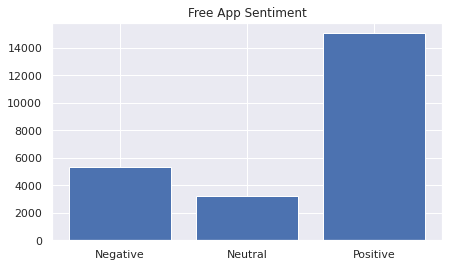

In [111]:
plt.figure(figsize=(7,4))
plt.bar(freeapp_names, freeapp_values)
plt.title("Free App Sentiment")
plt.show()

*   In free app we are having positive response more whereas negative and neutral are very less compared to positive response.

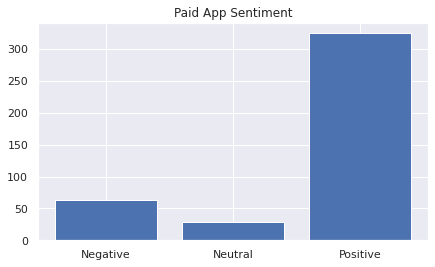

In [112]:
plt.figure(figsize=(7,4))
plt.bar(paidapp_names,paidapp_values)
plt.title("Paid App Sentiment")
plt.show()

*   In paid app we are having positive response more whereas negative and neutral are very less compared to positive response. 

# **STRIP PLOT:**
A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.
Input data can be passed in a variety of formats, including:
Vectors of data represented as lists, numpy arrays, or pandas Series objects passed directly to the x, y, and/or hue parameters.
A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.
A “wide-form” DataFrame, such that each numeric column will be plotted.
An array or list of vectors.

Text(0.5, 1.0, 'Sentiment Polarity vs type')

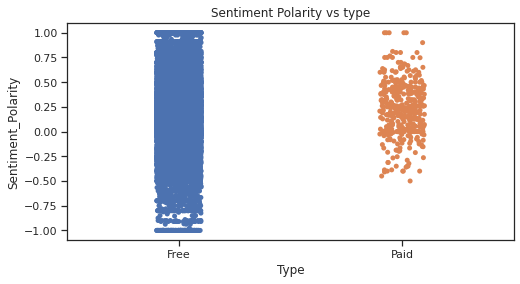

In [113]:
#Plotting strip plot for type vs sentiment polarity
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sentiment_type = sns.stripplot(x = 'Type', y = 'Sentiment_Polarity', data = userRating_playstore_df)
sentiment_type.set_title('Sentiment Polarity vs type')

*  The polarity of a sentiment measures how negative or positive the context is.

*  In the data that we have, the polarity ranges from -1 to +1.

*  In strip plot we can see that for free apps the sentiment polarity value count are very high compared to paid apps. 
*  Free apps are having Positive ,Neutral as well as positive sentiments whereas in Paid Positive sentiment are more


### **WordCloud**

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.For generating word cloud in Python, modules needed are – matplotlib, pandas and wordcloud. 

**STOP WORDS:**
A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. 

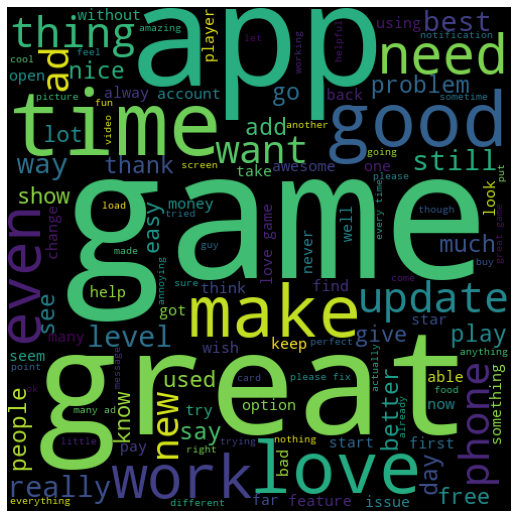

In [114]:
# Creating df for type= free
free_apps = userRating_playstore_df[userRating_playstore_df["Type"] == "Free"]

words = ''
stopwords = set(STOPWORDS)

#Iterate through csv file and splitting the sentence into tokens
for val in free_apps.Translated_Review:    
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    #Converting to lower case
    tokens[i] = tokens[i].lower()
      
  words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()                

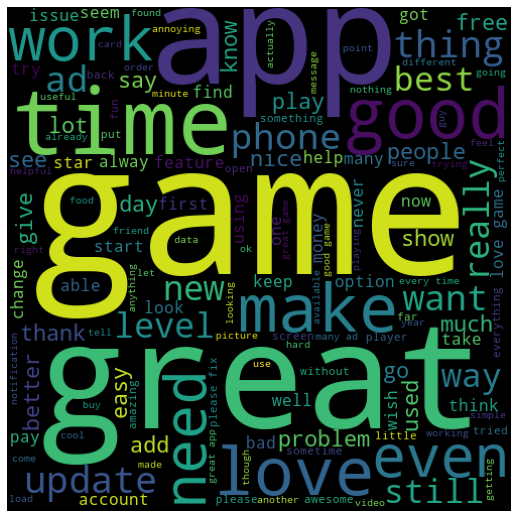

In [115]:
# Creating df for type= free

paid_apps = userRating_playstore_df[userRating_playstore_df["Type"] == "Paid"]
words = ''
stopwords = set(STOPWORDS)

#Iterate through csv file and splitting the sentence into tokens
for val in free_apps.Translated_Review:    
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    #Converting to lower case
    tokens[i] = tokens[i].lower()
      
  words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()                

In [116]:
#Merging playstore df and user rating df w.r.t App
playstore_user_onApp = play_store_df_1.merge(userRatings_df, on = "App")
playstore_user_onApp.head()

playstore_user_onApp = playstore_user_onApp.dropna(subset=['Translated_Review'])

In [117]:
playstore_user_onApp.head()

,App,Installs,Category,Rating,Reviews,Size_in_MB,Type,Price_in_dollars,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,500000,HEALTH_AND_FITNESS,4.0,2490,3.8,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.,2.3,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,500000,HEALTH_AND_FITNESS,4.0,2490,3.8,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.,2.3,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,500000,HEALTH_AND_FITNESS,4.0,2490,3.8,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.,2.3,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,500000,HEALTH_AND_FITNESS,4.0,2490,3.8,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.,2.3,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,500000,HEALTH_AND_FITNESS,4.0,2490,3.8,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.,2.3,Best way,Positive,1.00,0.300000


# **NLTK:**
NLTK is a standard python library with prebuilt functions and utilities for the ease of use and implementation. It is one of the most used libraries for natural language processing and computational linguistics.

*  Corpus:
A dataset is referred to as corpus in nltk.
A corpus is essentially a collection of sentences which serves as an input. For further processing a corpus is broken down into smaller pieces and processed which we would see in later sections.

*   Word Tokenization(word_tokenize):-
Word tokenization is the process of breaking a sentence into words. word_tokenize function has been used, which returns a list of words as output.
*   Sentence Tokenization(sent_tokenize):-
Sentence tokenization is the process of breaking a corpus into sentence level tokens. It’s essentially used when the corps consists of multiple paragraphs. Each paragraph is broken down into sentences.



In [118]:
from wordcloud import WordCloud
wc = WordCloud(background_color="black", max_words=250, colormap="Set2")
from nltk import sent_tokenize, word_tokenize

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')
stop = stop + ['app', 'APP' ,'ap', 'App', 'apps', 'application', 'browser', 'website', 'websites', 'chrome', 'click', 'web', 'ip', 'address',
            'files', 'android', 'browse', 'service', 'use', 'one', 'download', 'email', 'Launcher','please','love','it','the','i',
              'I','my','like','really','every','would','even','though','game','review']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [119]:
#Function for plotting a wordplot
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 300,  max_font_size = 50, )
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')
    plt.title('Common Phrases in Reviews')

1. Counter class:-It is a special type of object data-set provided with the collections module in Python3. Collections module provides the user with specialized container datatypes, thus, providing an alternative to Python’s general-purpose built-ins like dictionaries, lists, and tuples. Counter is a sub-class that is used to count hashable objects. It implicitly creates a hash table of an iterable when invoked.
2. Punctuation Removal:-
Punctuations are of little use in NLP so they are removed.

In [120]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

top_N = 100

pos_review_lower = playstore_user_onApp[playstore_user_onApp['Sentiment']=='Positive']['Translated_Review'].str.lower().str.cat(sep=' ')
neg_review_lower = playstore_user_onApp[playstore_user_onApp['Sentiment']=='Negative']['Translated_Review'].str.lower().str.cat(sep=' ')
neu_review_lower = playstore_user_onApp[playstore_user_onApp['Sentiment']=='Neutral']['Translated_Review'].str.lower().str.cat(sep=' ')

#Removing Punctuation
pos_review_remove = re.sub('[^A-Za-z]+', ' ', pos_review_lower)
neg_review_remove = re.sub('[^A-Za-z]+', ' ', neg_review_lower)
neu_review_remove = re.sub('[^A-Za-z]+', ' ', neu_review_lower)

# **STOP WORDS:**
Stop words are words which occur frequently in a corpus. e.g a, an, the, in. Frequently occurring words are removed from the corpus for the sake of text-normalization.

In [121]:
#Removing stopwords
pos_word_tokens_tags = word_tokenize(pos_review_remove)
neg_word_tokens_tags = word_tokenize(neg_review_remove)
neu_word_tokens_tags = word_tokenize(neu_review_remove)
pos_filtered_sentence_tags = [w_tags for w_tags in pos_word_tokens_tags if not w_tags in stop]
pos_filtered_sentence_tags = []
for w_tags in pos_word_tokens_tags:
    if w_tags not in stop:
        pos_filtered_sentence_tags.append(w_tags)

neg_filtered_sentence_tags = [w_tags for w_tags in neg_word_tokens_tags if not w_tags in stop]
neg_filtered_sentence_tags = []
for w_tags in neg_word_tokens_tags:
    if w_tags not in stop:
        neg_filtered_sentence_tags.append(w_tags)
        
neu_filtered_sentence_tags = [w_tags for w_tags in neu_word_tokens_tags if not w_tags in stop]
neu_filtered_sentence_tags = []
for w_tags in neu_word_tokens_tags:
    if w_tags not in stop:
        neu_filtered_sentence_tags.append(w_tags)

In [122]:
#Removing words with length less than 2
pos_without_single_chr_rev = [word_tags for word_tags in pos_filtered_sentence_tags if len(word_tags) > 2]
neg_without_single_chr_rev = [word_tags for word_tags in neg_filtered_sentence_tags if len(word_tags) > 2]
neu_without_single_chr_rev = [word_tags for word_tags in neu_filtered_sentence_tags if len(word_tags) > 2]


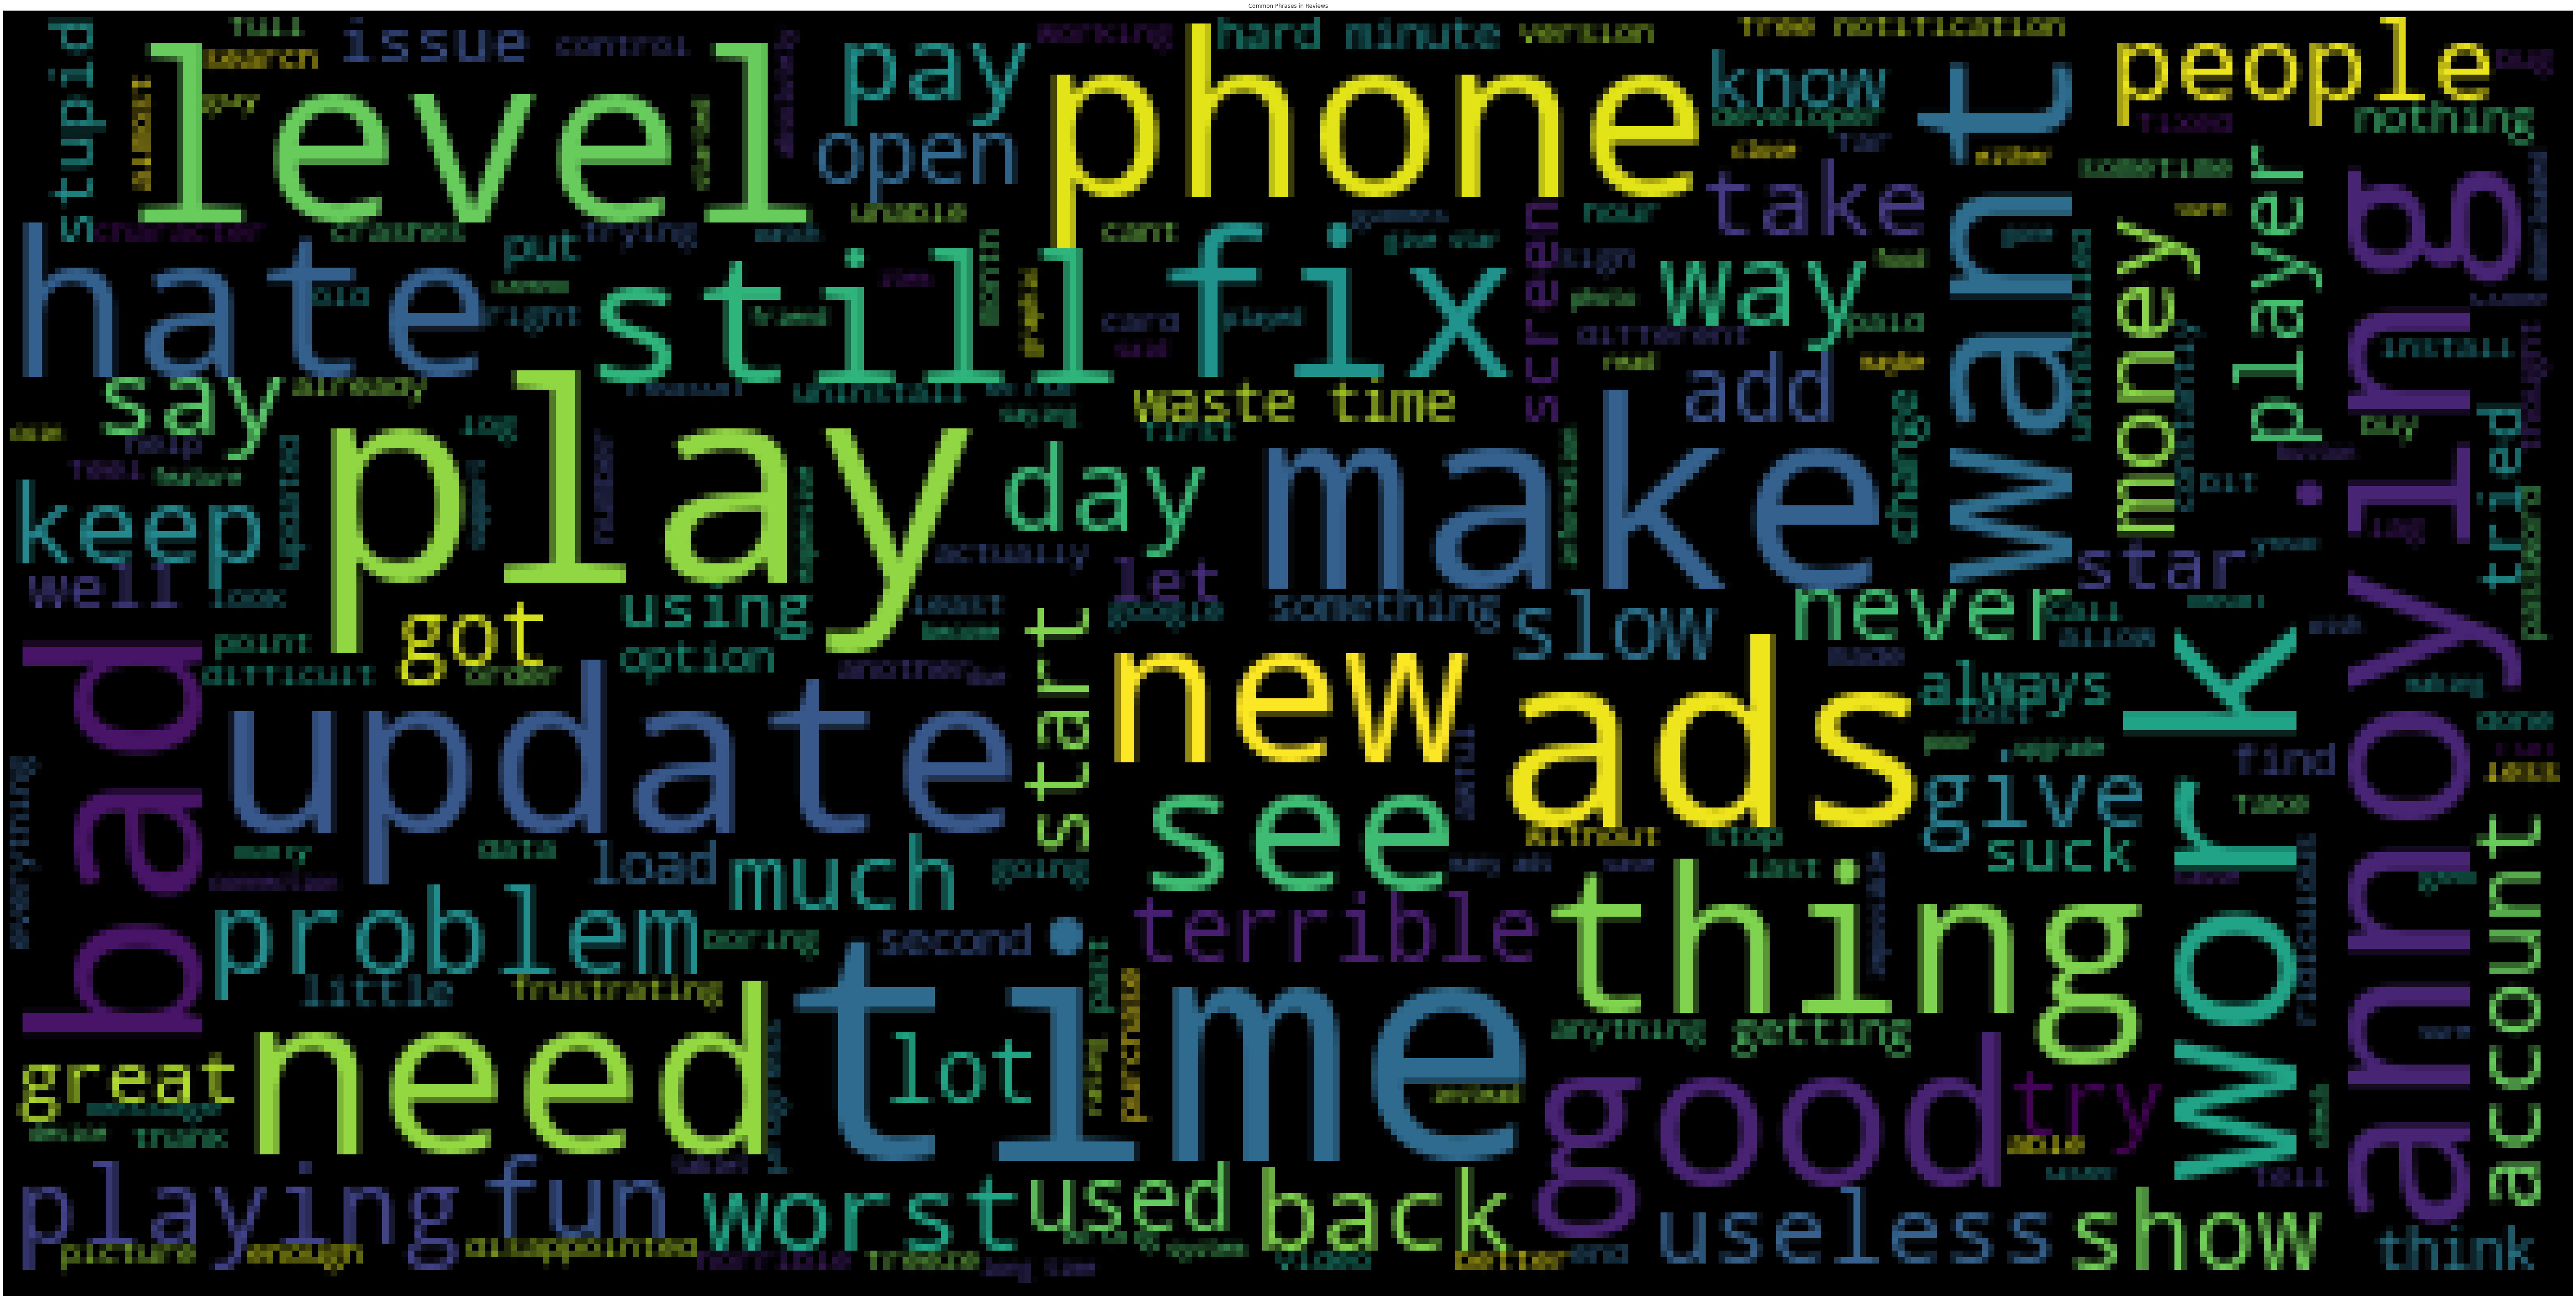

In [123]:
#Negative word plot 
wc(neg_without_single_chr_rev,'black','Common Words' )

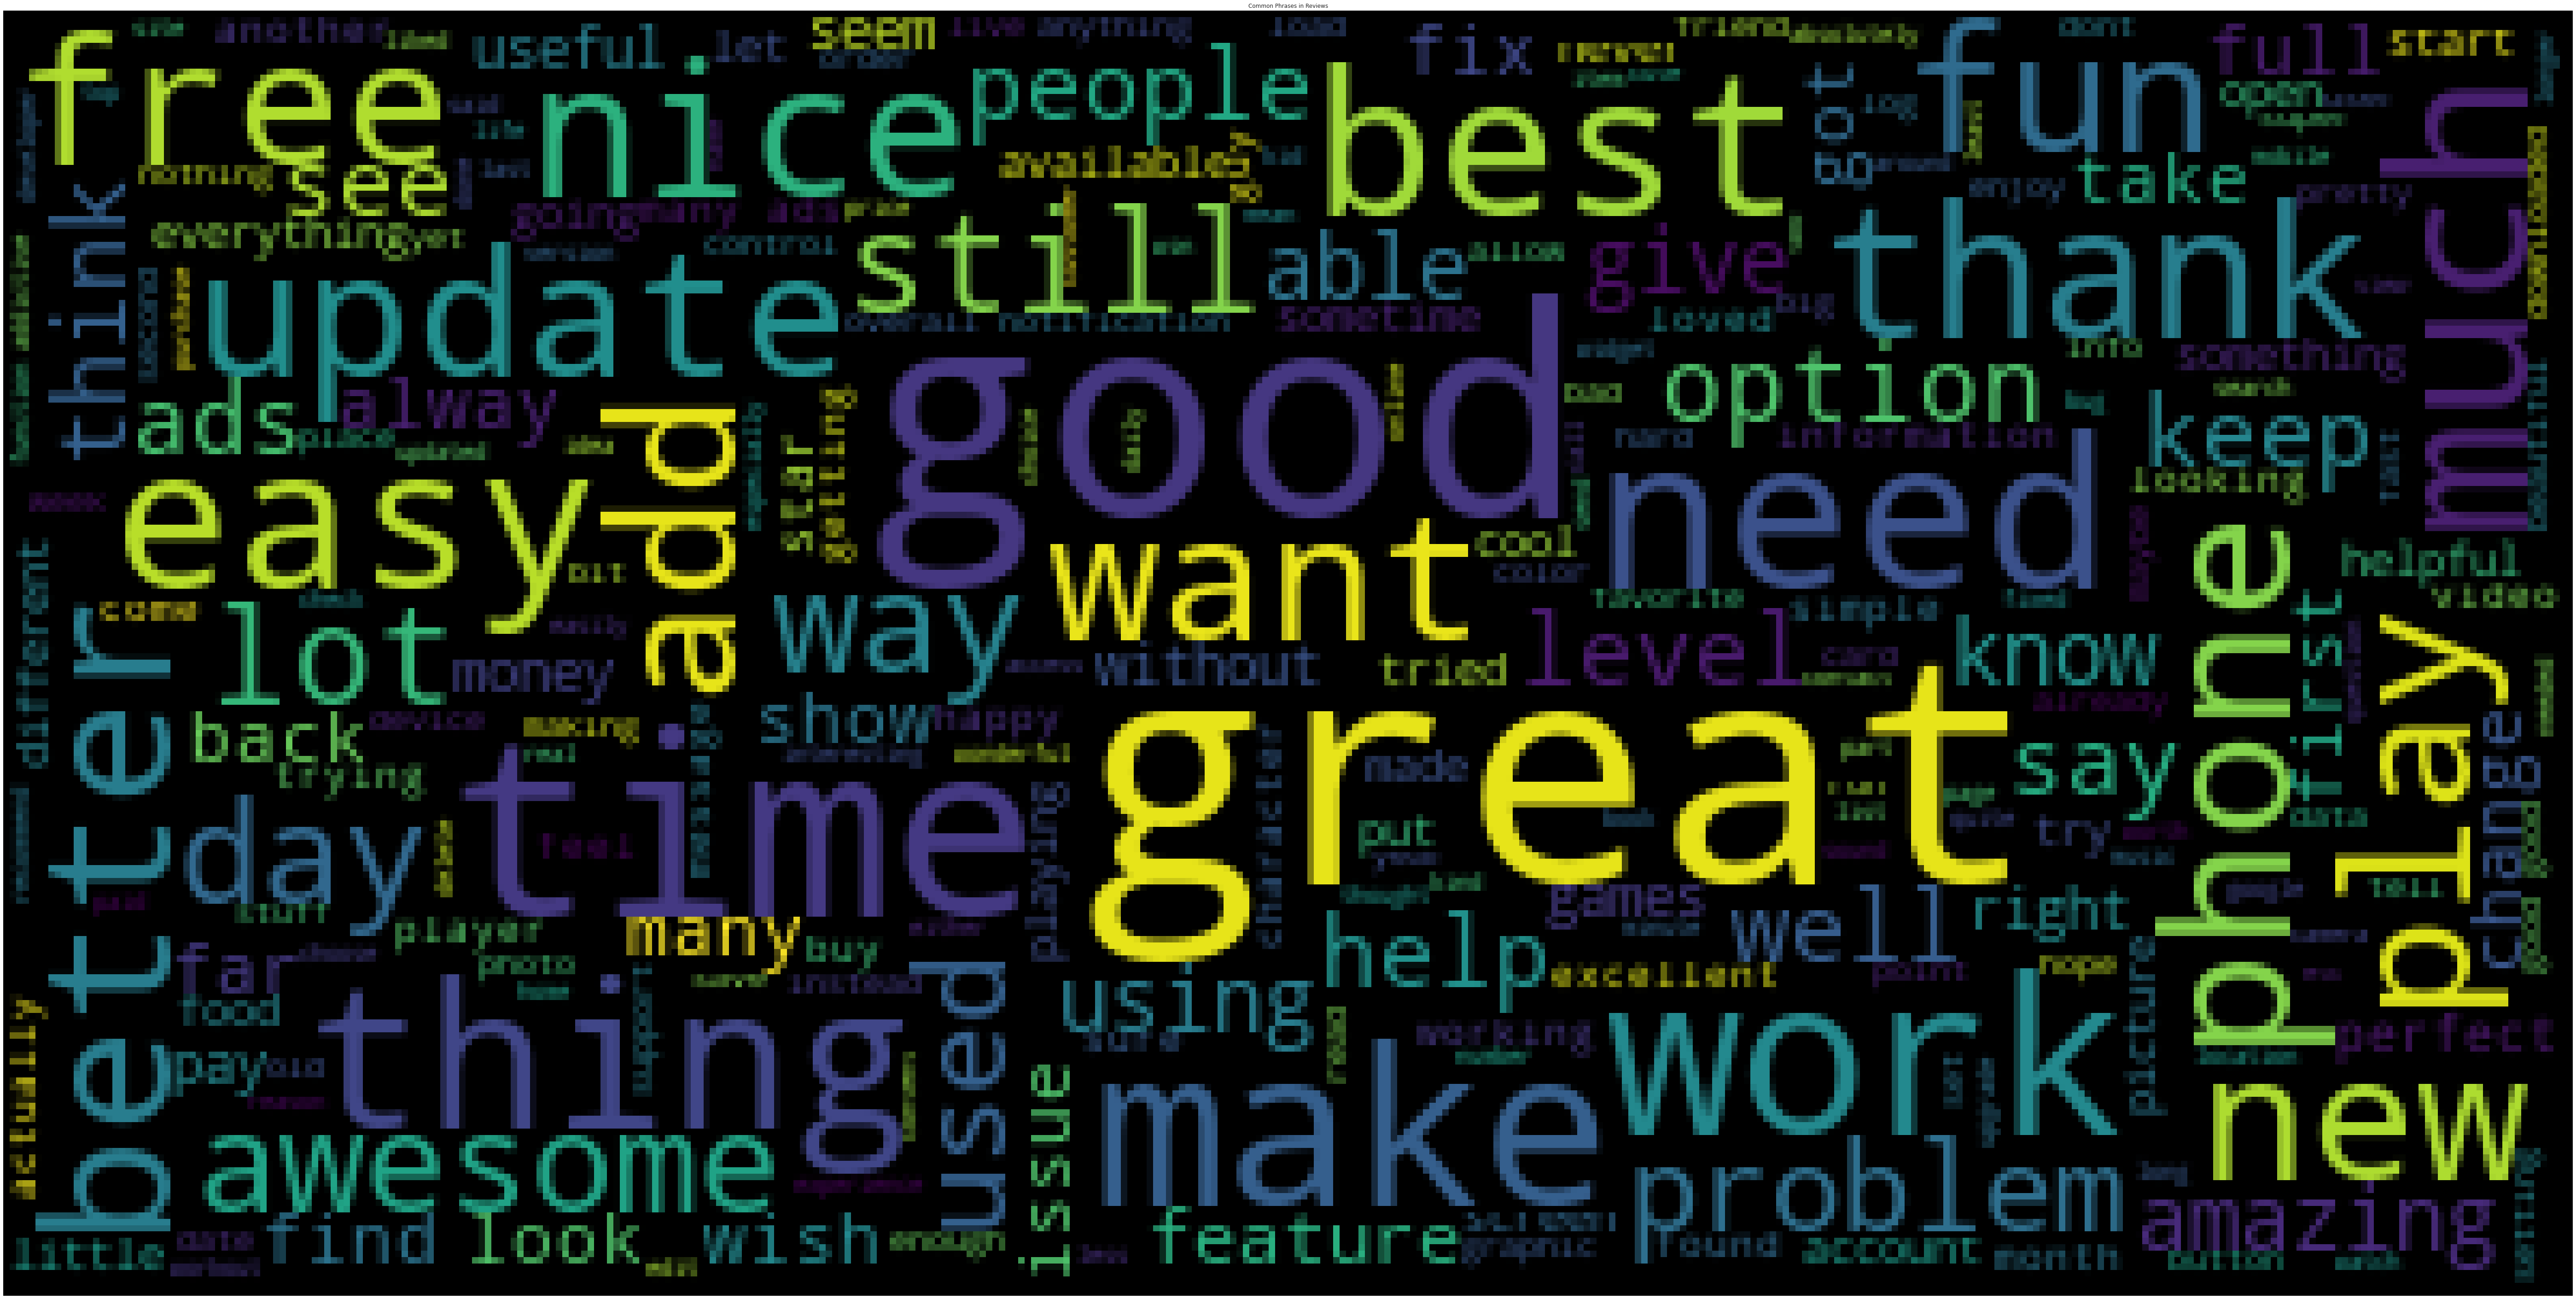

In [124]:
#Positive word plot
wc(pos_without_single_chr_rev,'black','Common Words' )

From here we didn't get any tangible insights. Our aim was to analyse the reviews and get a better idea of the common issues that people face with apps or the attributes that make an app popular. To accomplish this, we proceeded to extract phrases to get a better understanding that will support our analysis.

In [125]:
#Sentiment count w.r.t Category
sentiment_count = playstore_user_onApp.groupby(["Category","Sentiment"]).agg({'App': 'count'}).reset_index()
sentiment_sum =  playstore_user_onApp.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()
print(sentiment_sum.head())
print(sentiment_count.head())

              Category  Sentiment
0       ART_AND_DESIGN        345
1    AUTO_AND_VEHICLES        164
2               BEAUTY        302
3  BOOKS_AND_REFERENCE        275
4             BUSINESS        655
            Category Sentiment  App
0     ART_AND_DESIGN  Negative   58
1     ART_AND_DESIGN   Neutral   54
2     ART_AND_DESIGN  Positive  233
3  AUTO_AND_VEHICLES  Negative   11
4  AUTO_AND_VEHICLES   Neutral   20


In [126]:
#Function for splitting pair
def pair_split(x):
    words = re.sub('[^A-Za-z_]+', ' ', x)
    words = words.split()
    words_new = [x for x in words if x not in stop]
    if len(words_new) == 1:
        return words_new
    else:
        pairs = [words_new[i]+'_'+words_new[i+1] for i in range(len(words_new)-1)]
        return pairs

In [127]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

top_N = 100
pos_review_lower = playstore_user_onApp[playstore_user_onApp['Sentiment']=='Positive']['Translated_Review'].str.lower().apply(pair_split).apply(lambda x: " ".join(x)).str.cat(sep=' ')
neg_review_lower = playstore_user_onApp[playstore_user_onApp['Sentiment']=='Negative']['Translated_Review'].str.lower().apply(pair_split).apply(lambda x: " ".join(x)).str.cat(sep=' ')

pos_review_lower_rem = pos_review_lower.split(' ')
pos_review_lower_rem = [a for a  in pos_review_lower_rem if a.find('_') >0]
pos_review_remove_pun = " ".join(pos_review_lower_rem)

neg_review_lower_rem = neg_review_lower.split(' ')
neg_review_lower_rem = [a for a  in neg_review_lower_rem if a.find('_') >0]
neg_review_remove_pun = " ".join(neg_review_lower_rem)


In [128]:
pos_word_tokens_tags = word_tokenize(pos_review_remove_pun)
neg_word_tokens_tags = word_tokenize(neg_review_remove_pun)
#Removing Stop words
pos_filtered_sentence_tags = [w_tags for w_tags in pos_word_tokens_tags if not w_tags in stop]
pos_filtered_sentence_tags = []
for w_tags in pos_word_tokens_tags:
    if w_tags not in stop:
        pos_filtered_sentence_tags.append(w_tags)

neg_filtered_sentence_tags = [w_tags for w_tags in neg_word_tokens_tags if not w_tags in stop]
neg_filtered_sentence_tags = []
for w_tags in neg_word_tokens_tags:
    if w_tags not in stop:
        neg_filtered_sentence_tags.append(w_tags)
        

In [129]:
#Discarding words with length less than 2
pos_without_single_chr_rev = [word_tags for word_tags in pos_filtered_sentence_tags if len(word_tags) > 2]
neg_without_single_chr_rev = [word_tags for word_tags in neg_filtered_sentence_tags if len(word_tags) > 2]

In [130]:
#Getting count of most common negative words
counts = Counter(neg_without_single_chr_rev)
count_top30 = counts.most_common(10)
count_top30

[('waste_time', 137),
 ('long_time', 65),
 ('many_ads', 64),
 ('worst_ever', 57),
 ('google_play', 48),
 ('give_stars', 46),
 ('angry_birds', 42),
 ('gift_card', 42),
 ('last_update', 39),
 ('spend_money', 37)]

Text(0.5, 1.0, 'Common Phrases in Negative Reviews')

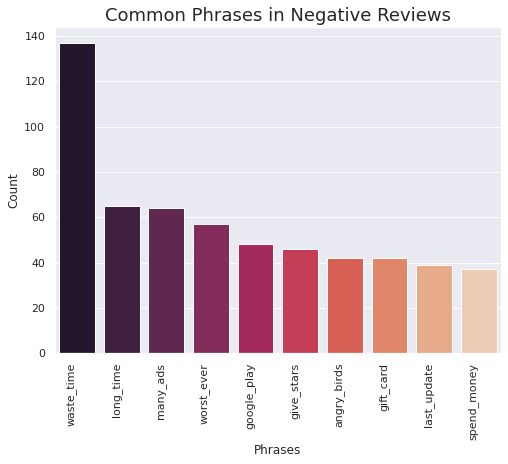

In [131]:
count_top30_df = pd.DataFrame(count_top30, columns=["Phrases","Count"])
plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
category_plot = sns.barplot(x="Phrases",y ="Count",data=count_top30_df, palette = "rocket")
category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=90, ha="right")
plt.title('Common Phrases in Negative Reviews',size = 18)

waste_time is most used phrase in negative reviews

In [132]:
#Getting count of most common negative words
from collections import Counter
counts = Counter(pos_without_single_chr_rev)
count_top30 = counts.most_common(10)
count_top30

[('many_ads', 243),
 ('free_version', 107),
 ('much_better', 105),
 ('best_ever', 104),
 ('user_friendly', 96),
 ('works_great', 95),
 ('highly_recommend', 93),
 ('wish_could', 89),
 ('first_time', 88),
 ('way_many', 86)]

Text(0.5, 1.0, 'Common Phrases in Positive Reviews')

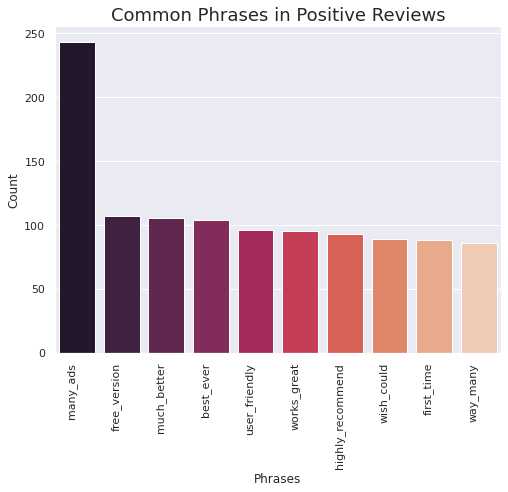

In [133]:
count_top30_df = pd.DataFrame(count_top30, columns=["Phrases","Count"])
plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
category_plot = sns.barplot(x="Phrases",y ="Count",data=count_top30_df, palette = "rocket")
category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=90, ha="right")
plt.title('Common Phrases in Positive Reviews',size = 18)

many_ads is the most used phrase in Positive reviews

In [134]:
paid_apps=userRating_playstore_df[userRating_playstore_df['Type']=='Paid']
 
free_apps=userRating_playstore_df[userRating_playstore_df['Type']=='Free']
 


# **HIST PLOT:**
A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins.
This function can normalize the statistic computed within each bin to estimate frequency, density or probability mass, and it can add a smooth curve obtained using a kernel density estimate, similar to kdeplot().

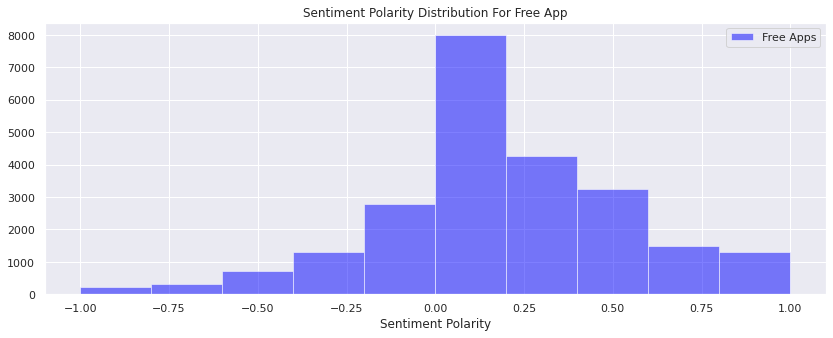

In [135]:
polarity_free = free_apps["Sentiment_Polarity"]

# Plot two histograms showing sentiment polarity of each app type
plt.figure(figsize=(14,5))
plt.hist(polarity_free, color="blue",alpha=.5, label="Free Apps")

plt.title('Sentiment Polarity Distribution For Free App')
plt.xlabel('Sentiment Polarity')
plt.legend(loc='upper right')
plt.show()

The most sentiment polarity is between 0.00 to 0.25 for free apps.

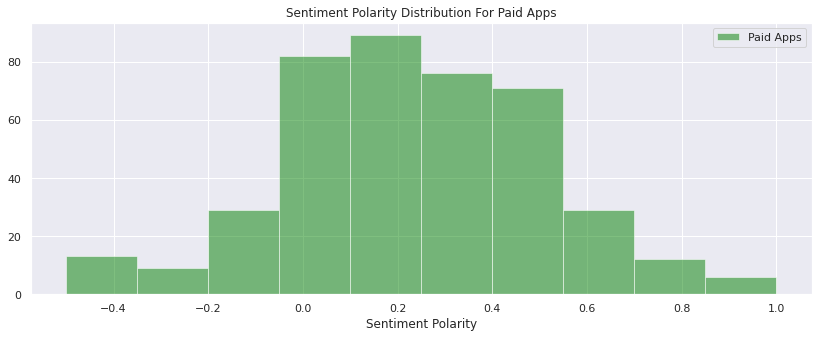

In [136]:
polarity_paid = paid_apps['Sentiment_Polarity']

# Plot two histograms showing sentiment polarity of each app type
plt.figure(figsize=(14,5))
plt.hist(polarity_paid, color="green",alpha=.5, label="Paid Apps")

plt.title('Sentiment Polarity Distribution For Paid Apps')
plt.xlabel('Sentiment Polarity')
plt.legend(loc='upper right')
plt.show()

The most sentiment polarity is between 0.1 to 0.2 for paid apps.

## **CONCLUSION:**

1.   
Average rating for apps is in between 4.0 and 4.5.There are 2000+ apps with rating between 4.0 to 4.5.
2.   
Lifestyle, Family,  and Finance categories are having highest price.Most of the categories are having price less than or equal to 50 $.

3. Family category is having the highest count.Game is the second highest category.
4. The number of installs are greater if reviews are higher.
5. Apps with highest rating i.e. is between 4.0 to 4.5 is having size 0-20 MB.
Gaming and Family categorical apps are bulky but for Gaming category most people download apps evenif it is bulky.
6. Travel and Local is the category which is having highest number of ratings as 5.
7. "I'm Rich - Trump Edition" this app is haing the highest price i.e 400 $ but is not Installed by many users. 
8. "Clash of Clans" is the app with highest review which comes under game category which is free of cost.The first 4 apps with reviews are of GAME category Clash of Clans,Subway Surfers,Clash Royale,Candy Crush Saga
9. Clash of Clans app has most number of reviews. While Subway Surfers is most number of install app
10. When it comes to free apps, users are more pessimistic and harsh than when it comes to paid apps.
11. More than half users rate Family, Sports and Health & Fitness apps positively. Apps for games and social media get mixed reviews, with 50 percent positive and 50 percent negative responses.

